In [9]:
obs = pd.read_csv("obs_matrix.csv")
obs = obs.drop(['map_Sky Temple', 'allied_char_Gall', 'opposing_char_Gall', 'opposing_char_Kerrigan', 'allied_char_Kerrigan'], axis=1)


def fit_estimate(obs, character):
    obs_= obs.copy()
    obs_ = obs_.rename(columns={character : 'EXPOSURE', 'outcome': 'OUTCOME'})

    model = ' + '.join("Q('%s')" % c for c in obs_.columns if c not in ['OUTCOME', 'EXPOSURE'])
    
    
    from zepid.causal.ipw import IPTW
    ipt = IPTW(obs_, treatment='EXPOSURE', stabilized=True)
    ipt.regression_models(model)
    ipt.fit()
    obs_['iptw'] = ipt.Weight

    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from statsmodels.genmod.families import family,links

    ind = sm.cov_struct.Independence()

    f = sm.families.family.Binomial(sm.families.links.identity)
    linrisk = smf.gee('OUTCOME ~ EXPOSURE', obs_.index, obs_, cov_struct=ind, family=f, weights=obs_['iptw']).fit()
    print("⛑⛑")
    print(character)
    print(linrisk.params)
    
    


In [10]:
obs.head()

,allied_avg_hero_level,allied_avg_mrr,allied_char_Abathur,allied_char_Alarak,allied_char_Anubarak,allied_char_Artanis,allied_char_Arthas,allied_char_Auriel,allied_char_Azmodan,allied_char_Brightwing,...,opposing_char_Uther,opposing_char_Valeera,opposing_char_Valla,opposing_char_Varian,opposing_char_Xul,opposing_char_Zagara,opposing_char_Zarya,opposing_char_Zeratul,opposing_char_Zuljin,outcome
0,12.6,2613.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9.4,2624.6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,8.6,1999.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,6.0,1941.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,5.6,1751.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [11]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

In [12]:
def demean(s):
    return s - s.mean()


obs['allied_avg_mrr']        = demean(obs['allied_avg_mrr'])
obs['allied_avg_hero_level'] = demean(obs['allied_avg_hero_level'])
obs['opp_avg_hero_level']    = demean(obs['opp_avg_hero_level'])
obs['opp_avg_mrr']           = demean(obs['opp_avg_mrr'])


obs['allied_avg_mrr**2']          = obs['allied_avg_mrr']**2
obs['allied_avg_hero_level**2']   = obs['allied_avg_hero_level']**2
obs['opp_avg_hero_level**2']      = obs['opp_avg_hero_level']**2
obs['opp_avg_mrr**2']             = obs['opp_avg_mrr']**2
      

lg = Logit(obs['outcome'], add_constant(obs.drop('outcome', axis=1)))

In [13]:
results = lg.fit()

Optimization terminated successfully.
         Current function value: 0.655268
         Iterations 5


In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                99998
Model:                          Logit   Df Residuals:                    99857
Method:                           MLE   Df Model:                          140
Date:                Thu, 13 Sep 2018   Pseudo R-squ.:                 0.05465
Time:                        22:03:11   Log-Likelihood:                -65525.
converged:                       True   LL-Null:                       -69313.
                                        LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.222e-12      0.226    5.4e-12      1.000      -0.444       0.444
allied_avg_hero_level              0.0208      0.003      7.669      0.000       0.015       0.026
allied_avg_mrr                     0.0023   4.23e-05     53.942      0.000       0.002       0.002
allied_char_Abathur               -0.0948      0.049     -1.949      0.051      -0.190       0.001
allied_char_Alarak                -0.1239      0.047     -2.616      0.009      -0.217      -0.031
allied_char_Anubarak               0.2178      0.037      5.890      0.000       0.145       0.290
allied_char_Artanis                0.0317      0.037      0.868      0.386      -0.040       0.103
allied_char_Arthas                -0.0681      0.037     -1.838      0.066      -0.141       0.005
allied_char_Auriel                 0.2367      0.044      5.336      0.000       0.150       0.324
allied_char_Azmodan                0.0509      0.046      1.112      0.266      -0.039       0.141
allied_char_Brightwing             0.2199      0.046      4.769      0.000       0.130       0.310
allied_char_Cassia                -0.0740      0.044     -1.671      0.095      -0.161       0.013
allied_char_Chen                  -0.0910      0.054     -1.676      0.094      -0.197       0.015
allied_char_Cho                   -0.0296      0.098     -0.302      0.763      -0.222       0.163
allied_char_Chromie               -0.1479      0.042     -3.561      0.000      -0.229      -0.067
allied_char_Dehaka                -0.0521      0.039     -1.332      0.183      -0.129       0.025
allied_char_Diablo                -0.1250      0.038     -3.301      0.001      -0.199      -0.051
allied_char_E.T.C.                -0.3184      0.041     -7.732      0.000      -0.399      -0.238
allied_char_Falstad               -0.0843      0.038     -2.231      0.026      -0.158      -0.010
allied_char_Gazlowe               -0.0461      0.050     -0.915      0.360      -0.145       0.053
allied_char_Genji                 -0.2310      0.036     -6.365      0.000      -0.302      -0.160
allied_char_Greymane               0.0133      0.038      0.348      0.728      -0.062       0.089
allied_char_Guldan                -0.0751      0.037     -2.045      0.041      -0.147      -0.003
allied_char_Illidan               -0.2319      0.046     -5.006      0.000      -0.323      -0.141
allied_char_Jaina                  0.0057      0.038      0.150      0.881      -0.069       0.080
allied_char_Johanna               -0.0566      0.039     -1.435      0.151      -0.134       0.021
allied_char_Kaelthas               0.0620      0.036      1.737      0.082      -0.008       0.132
allied_char_Kharazim               0.0971      0.046      2.103      0.035       0.007       0.188
allied_char_Leoric                -0.0106      0.041     -0.261      0.794      -0.091       0.069
allied_char_Li Li                  0.2945      0.042      7.017      0.00

In [15]:
x = results.params.filter(like='allied_char')

In [16]:
y = pd.Series({c:obs.loc[obs[c].astype(bool)]['outcome'].mean() for c in x.index})

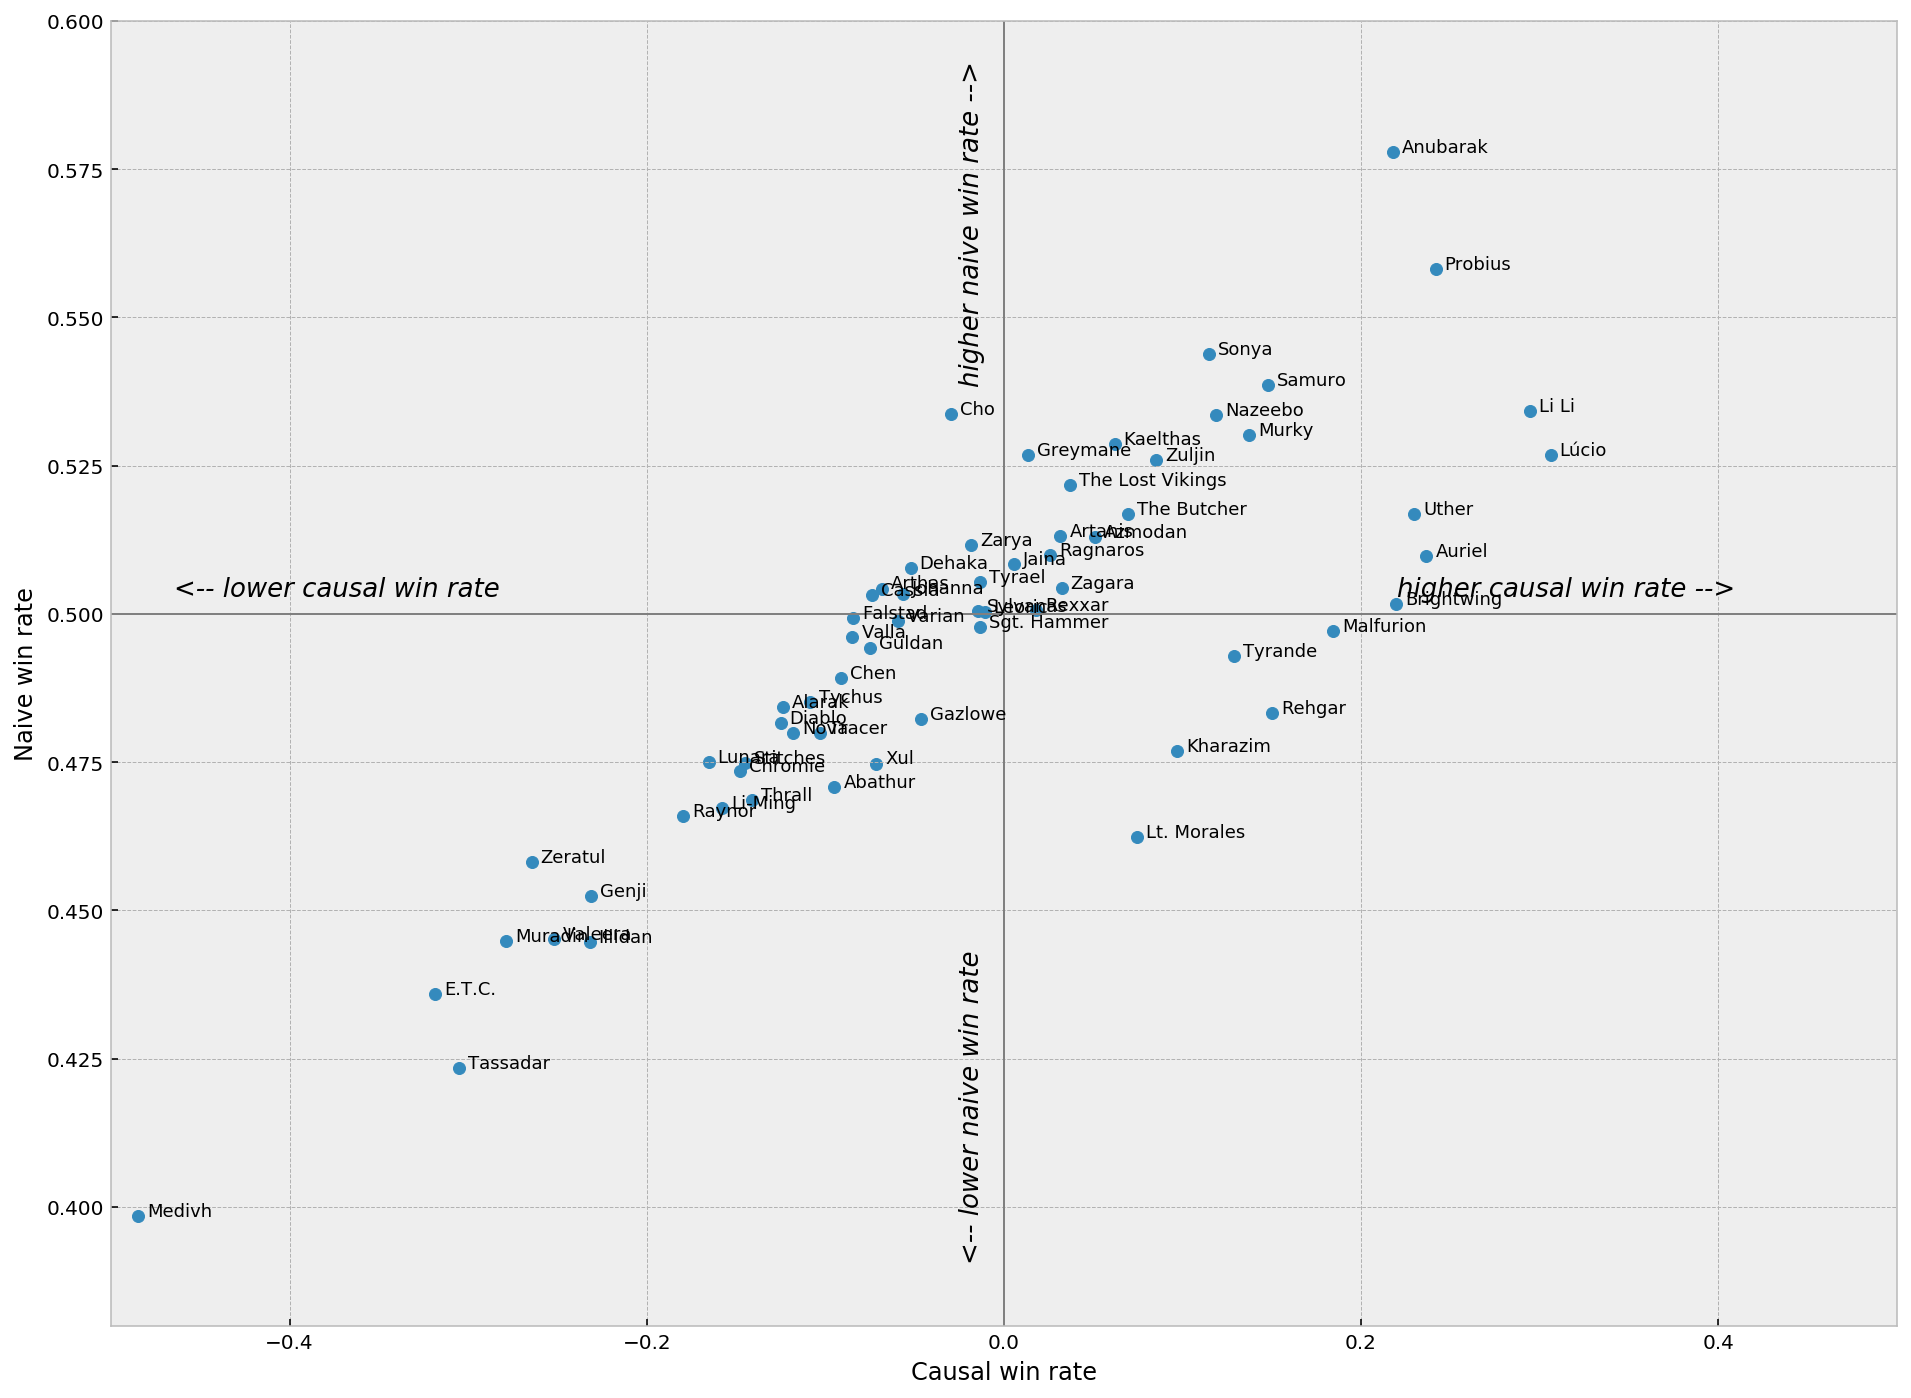

In [19]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
from matplotlib import pyplot as plt
plt.style.use('bmh')

set_matplotlib_formats('retina')

f, ax = plt.subplots(1,1,figsize=(16,12))
ax.scatter(x, y)

for i, txt in enumerate(x.index):
    txt = txt.lstrip("allied_char_")
    ax.annotate(txt, (x[i]+0.005, y[i]), fontsize=9)
    
#ax.set_ylabel("<--- lower naive winrate | higher naive winrate --->")

plt.hlines(0.5, -0.5, 0.5, lw=1, color='gray')
plt.vlines(0.0, 0.38, 0.6, lw=1, color='gray')

plt.xlim(-0.5, 0.5)
plt.ylim(0.38, 0.6)

ax.text(-0.025, 0.59, 'higher naive win rate -->', style='italic', rotation=90, fontsize=13)
ax.text(-0.025, 0.44, '<-- lower naive win rate', style='italic', rotation=90, fontsize=13)
ax.text(0.22, 0.503, 'higher causal win rate -->', style='italic', fontsize=13)
ax.text(-0.465, 0.503, '<-- lower causal win rate', style='italic', fontsize=13)


plt.ylabel("Naive win rate")
plt.xlabel("Causal win rate")

plt.savefig("causal_v_naive.png", bbox_inches='tight', dpi=250)

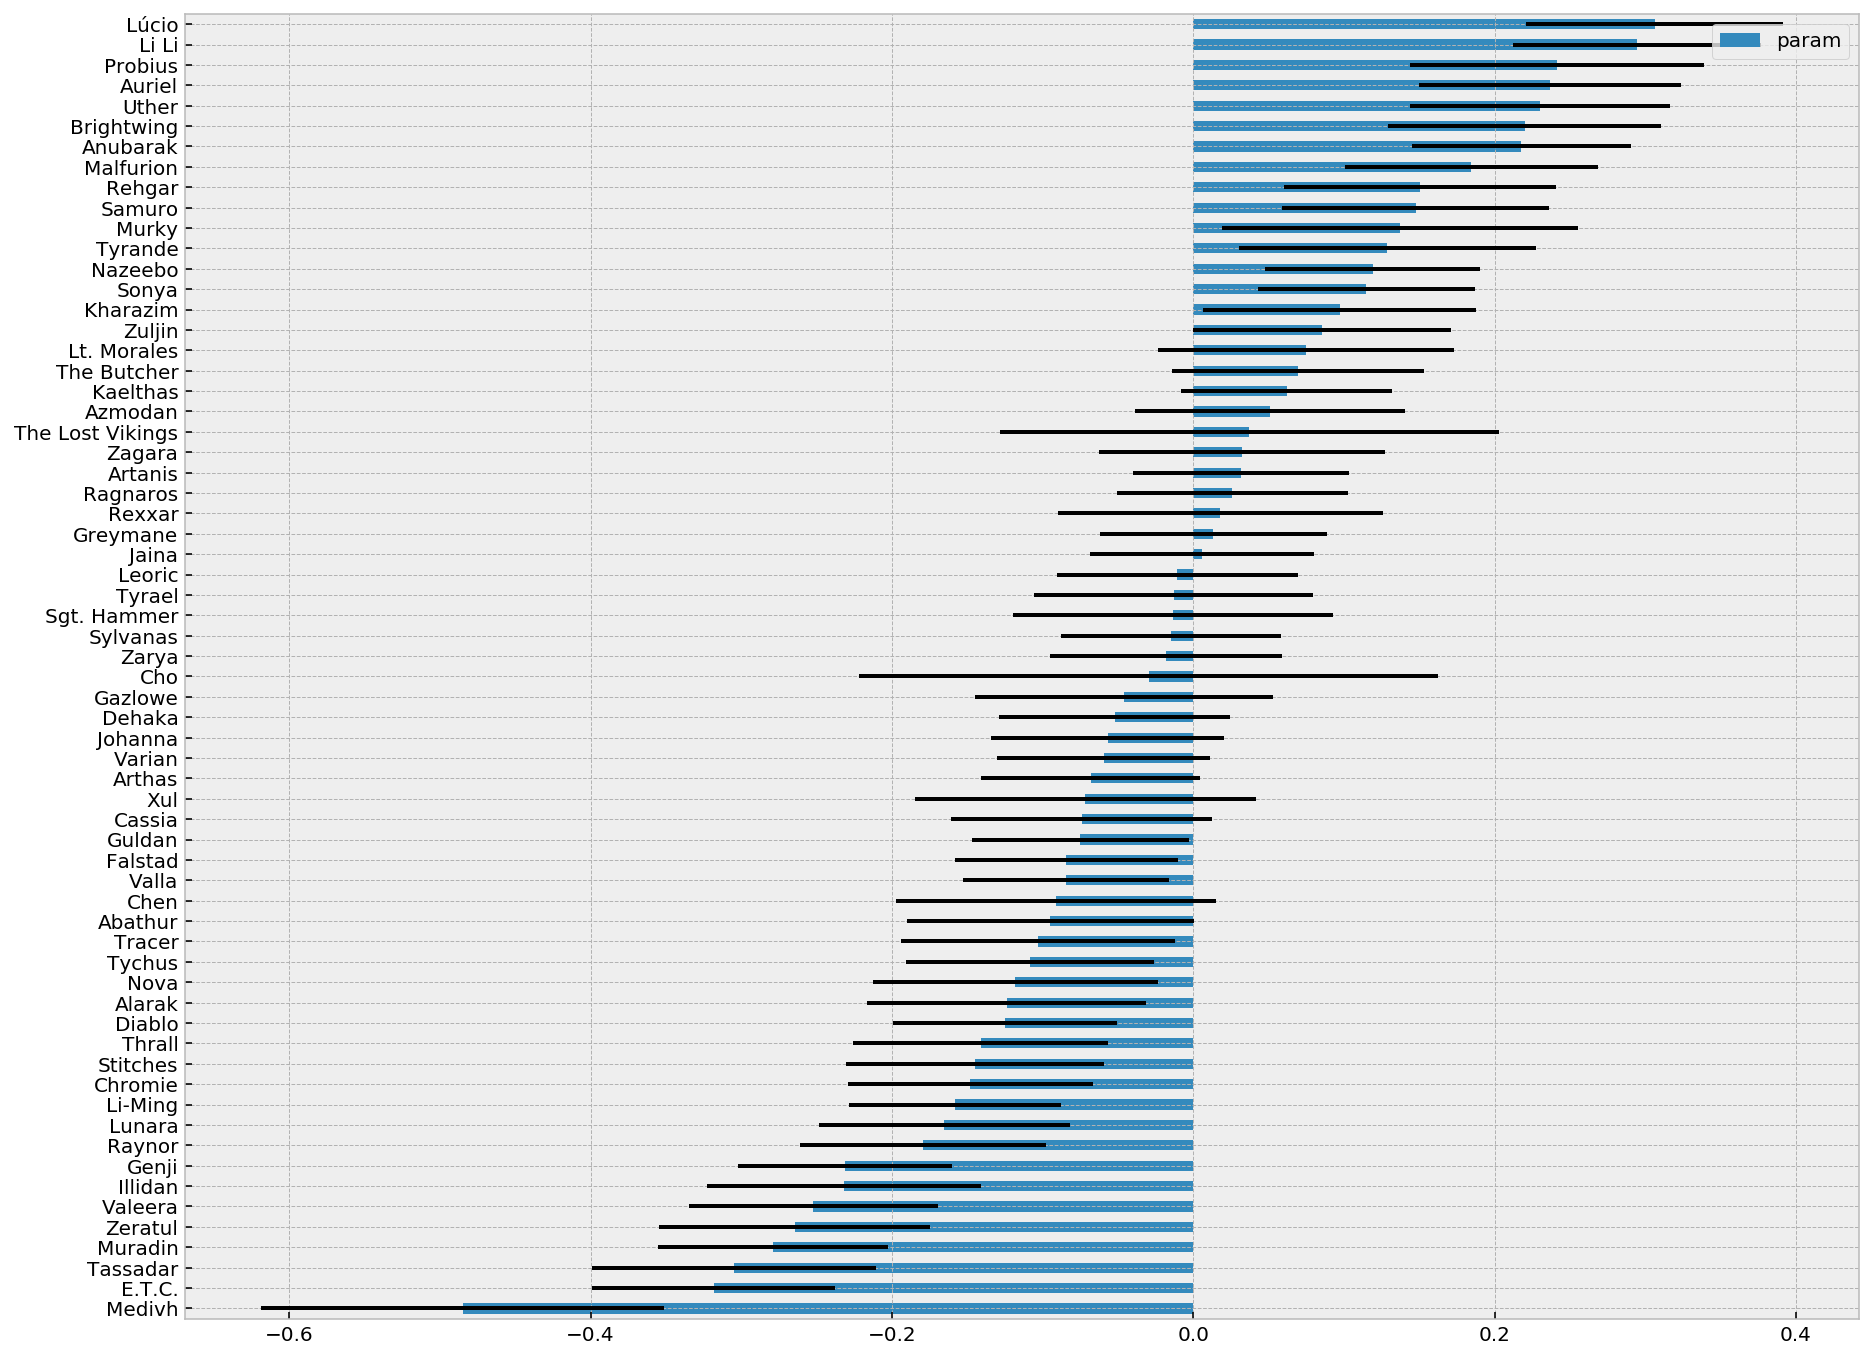

In [20]:
f, ax = plt.subplots(1,1,figsize=(15,12))

yerr = results.bse.filter(like='allied_char')

r = pd.DataFrame({'param': x, 'error': 1.96*yerr})
r.index = [_.lstrip('allied_char_') for _ in r.index]

r.sort_values('param').plot.barh(y='param', ax=ax, color='#348ABD', xerr='error', lw=0.1)
plt.savefig("coefs.png", bbox_inches='tight', dpi=250)

In [23]:
r.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>param</th>\n      <th>error</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Abathur</th>\n      <td>-0.094841</td>\n      <td>0.095362</td>\n    </tr>\n    <tr>\n      <th>Alarak</th>\n      <td>-0.123912</td>\n      <td>0.092844</td>\n    </tr>\n    <tr>\n      <th>Anubarak</th>\n      <td>0.217839</td>\n      <td>0.072494</td>\n    </tr>\n    <tr>\n      <th>Artanis</th>\n      <td>0.031704</td>\n      <td>0.071621</td>\n    </tr>\n    <tr>\n      <th>Arthas</th>\n      <td>-0.068054</td>\n      <td>0.072569</td>\n    </tr>\n    <tr>\n      <th>Auriel</th>\n      <td>0.236680</td>\n      <td>0.086944</td>\n    </tr>\n    <tr>\n      <th>Azmodan</th>\n      <td>0.050937</td>\n      <td>0.089799</td>\n    </tr>\n    <tr>\n      <th>Brightwing</th>\n      <td>0.219894</td>\n      <td>0.090378</td>\n    </tr>\n    <tr>\n      <th>Cassia</th>\n      <td>-0.073980</